# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Trainees - المتدربين/Week 4/4- Deep learning/1-Weekly Task/Datasets'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Trainees - المتدربين/Week 4/4- Deep learning/1-Weekly Task/Datasets


# Load the dataset


In [16]:
df = pd.read_csv('Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [17]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [18]:
df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high
6322,9:30:00 PM,9,Thursday,106,18,13,27,164,high
6323,11:45:00 PM,9,Thursday,14,3,1,15,33,normal


In [19]:
df.sample()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
554,6:30:00 PM,15,Sunday,77,1,10,25,113,normal


In [20]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


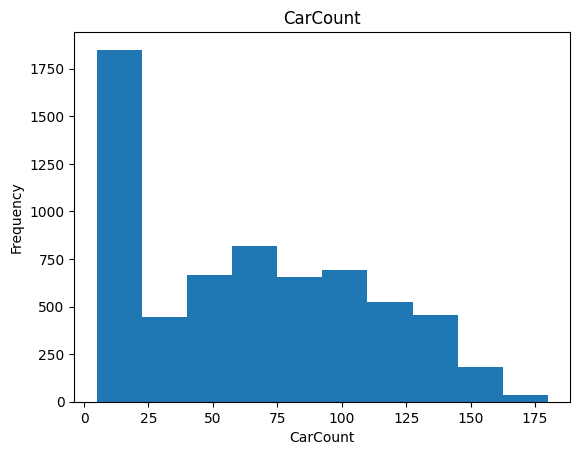

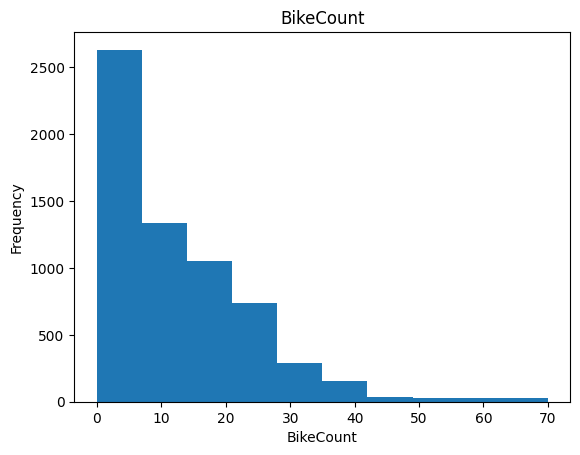

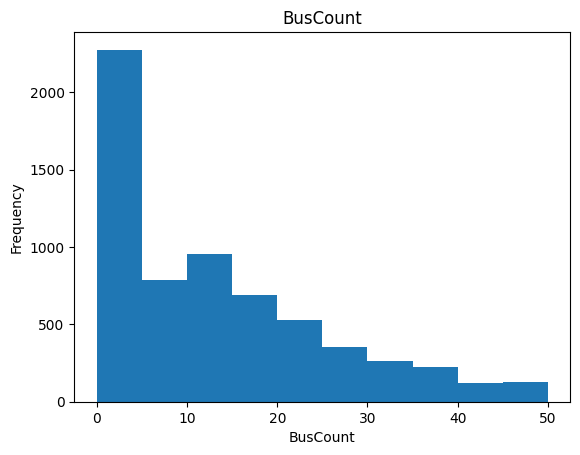

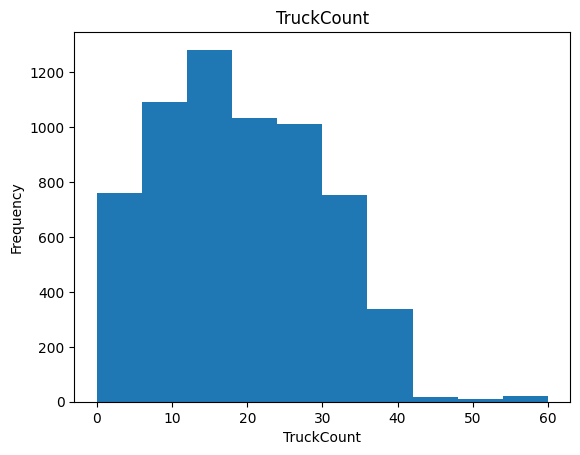

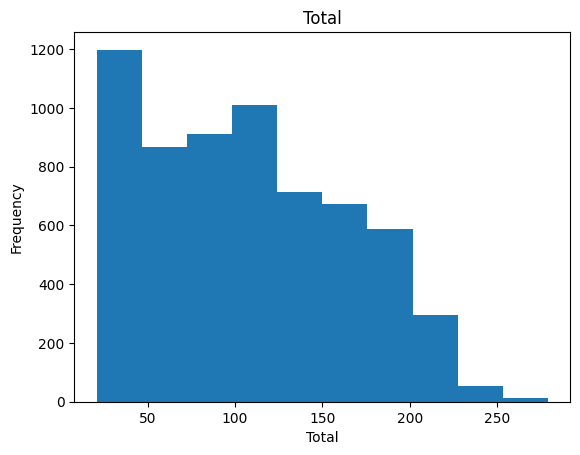

In [29]:
col_names = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
for col in col_names:
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(col)
  plt.show()

In [35]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [38]:
df['Date'].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [105]:
df.duplicated().sum()

0

In [37]:
df['Time'].unique()

array(['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM',
       '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM',
       '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM',
       '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM',
       '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM',
       '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM',
       '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM',
       '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM',
       '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM',
       '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM',
       '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM',
       '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM',
       '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM',
       '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM',
       '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM',
       '3:00:00 PM', '3:15:00 PM', '3:3

In [ ]:
df_corr = df.copy()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 61.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.5% of the points cannot be plac

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 67.1% of the points cannot be plac

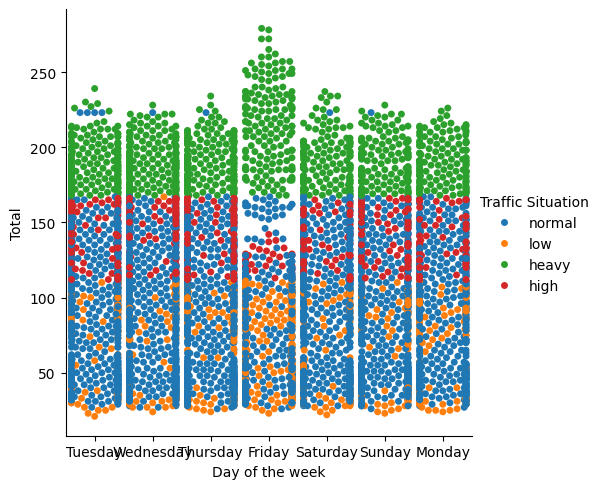

In [51]:

sns.catplot(data=df, x="Day of the week", y="Total", hue="Traffic Situation", kind="swarm")

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  if df[col].dtype == object:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

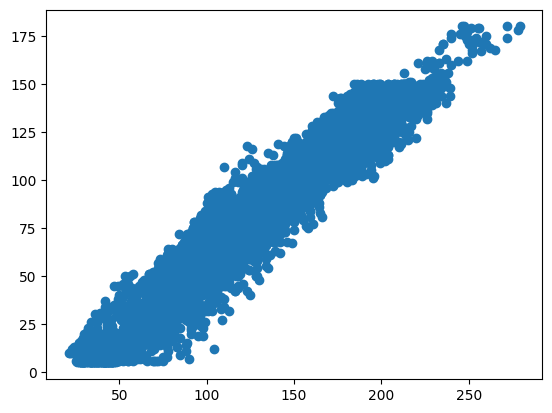

In [45]:
plt.scatter(df['Total'], df['CarCount'])
plt.show()

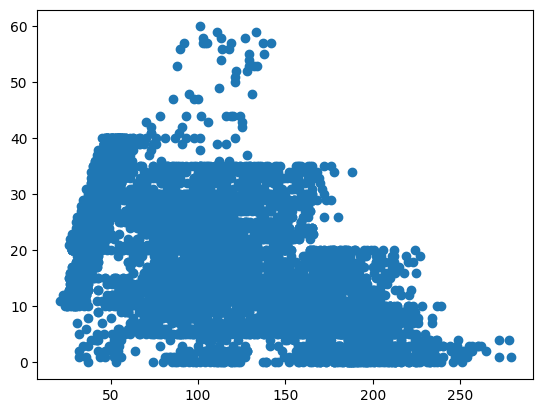

In [48]:
plt.scatter(df['Total'], df['TruckCount'])
plt.show()

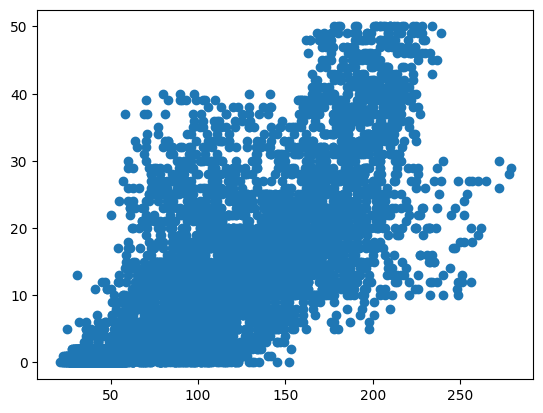

In [47]:
plt.scatter(df['Total'], df['BusCount'])
plt.show()

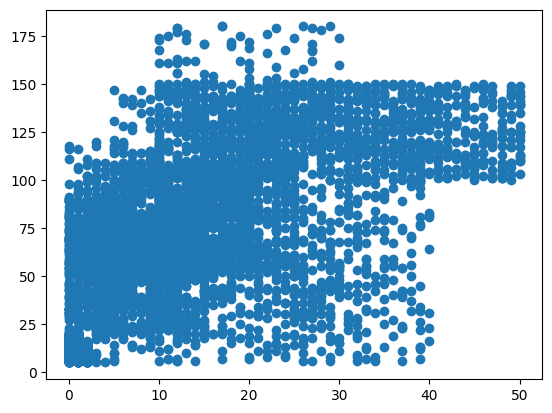

In [46]:
plt.scatter(df['BusCount'], df['CarCount'])
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Day of the week'] = le.fit_transform(df['Day of the week'])

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])

In [59]:
trafficSituation = np.reshape(df['Traffic Situation'], (-1, 2))

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
trafficSituation = enc.fit_transform(trafficSituation)
print(trafficSituation)

[[3. 3.]
 [3. 3.]
 [3. 3.]
 ...
 [3. 3.]
 [1. 1.]
 [1. 3.]]


In [43]:
for col in df.columns:
  print(col, df[col].value_counts())

Time Time
9:30:00 PM     77
7:15:00 PM     74
1:30:00 AM     73
9:00:00 PM     72
12:30:00 AM    72
               ..
5:15:00 PM     62
5:30:00 PM     62
5:45:00 PM     62
6:00:00 PM     62
12:00:00 PM    62
Name: count, Length: 96, dtype: int64
Date Date
27    211
31    211
26    208
19    208
13    208
4     208
3     207
8     207
20    206
21    205
29    205
14    204
16    204
22    204
30    204
1     203
28    203
23    203
5     203
24    203
6     203
18    203
15    203
12    203
9     202
11    201
17    200
10    199
2     199
7     198
25    198
Name: count, dtype: int64
Day of the week Day of the week
Thursday     1020
Wednesday    1012
Tuesday      1011
Friday        832
Saturday      819
Sunday        816
Monday        814
Name: count, dtype: int64
CarCount CarCount
15     182
14     155
11     152
12     144
13     143
      ... 
178      1
169      1
166      1
170      1
163      1
Name: count, Length: 173, dtype: int64
BikeCount BikeCount
1     525
2     518
0     

In [42]:
for col in df.columns:
  print(col, df[col].unique())

Time ['12:00:00 AM' '12:15:00 AM' '12:30:00 AM' '12:45:00 AM' '1:00:00 AM'
 '1:15:00 AM' '1:30:00 AM' '1:45:00 AM' '2:00:00 AM' '2:15:00 AM'
 '2:30:00 AM' '2:45:00 AM' '3:00:00 AM' '3:15:00 AM' '3:30:00 AM'
 '3:45:00 AM' '4:00:00 AM' '4:15:00 AM' '4:30:00 AM' '4:45:00 AM'
 '5:00:00 AM' '5:15:00 AM' '5:30:00 AM' '5:45:00 AM' '6:00:00 AM'
 '6:15:00 AM' '6:30:00 AM' '6:45:00 AM' '7:00:00 AM' '7:15:00 AM'
 '7:30:00 AM' '7:45:00 AM' '8:00:00 AM' '8:15:00 AM' '8:30:00 AM'
 '8:45:00 AM' '9:00:00 AM' '9:15:00 AM' '9:30:00 AM' '9:45:00 AM'
 '10:00:00 AM' '10:15:00 AM' '10:30:00 AM' '10:45:00 AM' '11:00:00 AM'
 '11:15:00 AM' '11:30:00 AM' '11:45:00 AM' '12:00:00 PM' '12:15:00 PM'
 '12:30:00 PM' '12:45:00 PM' '1:00:00 PM' '1:15:00 PM' '1:30:00 PM'
 '1:45:00 PM' '2:00:00 PM' '2:15:00 PM' '2:30:00 PM' '2:45:00 PM'
 '3:00:00 PM' '3:15:00 PM' '3:30:00 PM' '3:45:00 PM' '4:00:00 PM'
 '4:15:00 PM' '4:30:00 PM' '4:45:00 PM' '5:00:00 PM' '5:15:00 PM'
 '5:30:00 PM' '5:45:00 PM' '6:00:00 PM' '6:15:00 PM' '6

<Axes: >

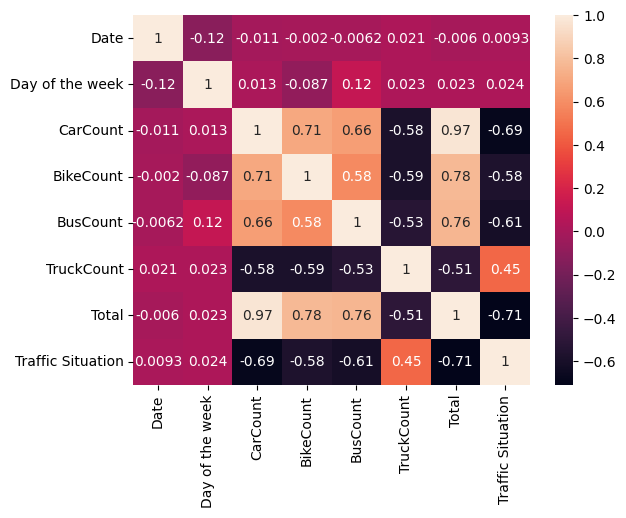

In [62]:
df_corr = df.drop('Time', axis = 1)
sns.heatmap(df_corr.corr(), annot = True)

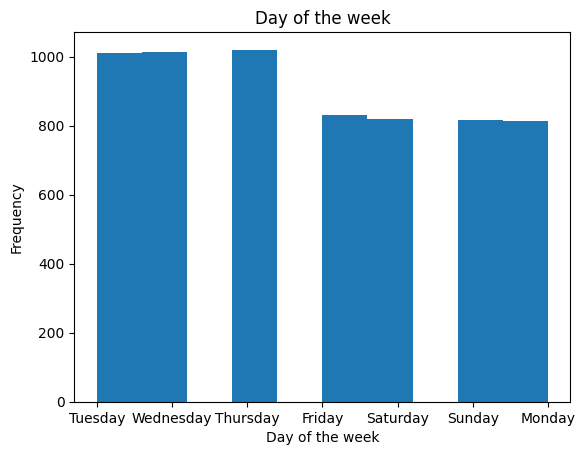

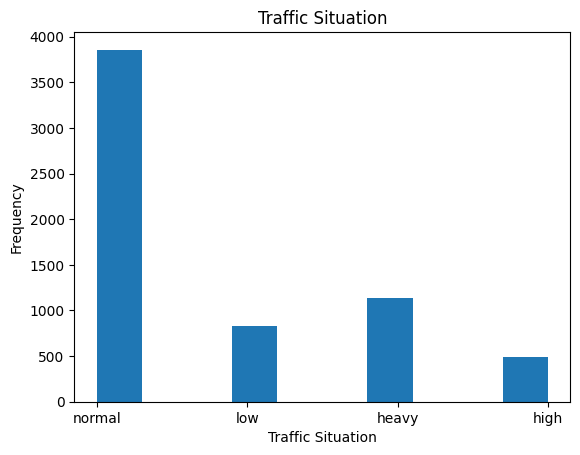

In [34]:
col_names = ['Day of the week', 'Traffic Situation']
for col in col_names:
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(col)
  plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [64]:
X = df[['CarCount', 'BikeCount', 'TruckCount', 'Total']]
y = df['Traffic Situation']

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [104]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy: ', acc)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print()

model = SVC()
bagging = BaggingClassifier(estimator = model, n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy:  0.857707509881423
precision:  0.8026319339851742
recall:  0.7892888857539225
f1:  0.7902669533826127

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       220
           1       0.78      0.61      0.69       102
           2       0.76      0.86      0.81       149
           3       0.92      0.92      0.92       794

    accuracy                           0.90      1265
   macro avg       0.85      0.84      0.84      1265
weighted avg       0.90      0.90      0.90      1265

[[212   6   0   2]
 [  3  62   0  37]
 [  0   0 128  21]
 [  9  11  40 734]]


# **Parsing**

In [103]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


model = KNeighborsClassifier()
parsing = BaggingClassifier(estimator = model, n_estimators=50, bootstrap=False, random_state=42)
parsing.fit(X_train, y_train)
y_pred = parsing.predict(X_test)


from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy: ', acc)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print()


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy:  0.857707509881423
precision:  0.8026319339851742
recall:  0.7892888857539225
f1:  0.7902669533826127

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       220
           1       0.72      0.52      0.60       102
           2       0.64      0.79      0.71       149
           3       0.89      0.88      0.89       794

    accuracy                           0.86      1265
   macro avg       0.80      0.79      0.79      1265
weighted avg       0.86      0.86      0.86      1265

[[213   1   0   6]
 [  2  53   0  47]
 [  0   0 117  32]
 [  7  20  65 702]]


# **Random Forest**

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score



rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy: ', acc)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print()

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy:  0.8782608695652174
precision:  0.8218688904391563
recall:  0.8340878572449046
f1:  0.8270402070063694

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.71      0.69      0.70       102
           2       0.66      0.76      0.71       149
           3       0.91      0.89      0.90       794

    accuracy                           0.88      1265
   macro avg       0.82      0.83      0.83      1265
weighted avg       0.88      0.88      0.88      1265

[[220   0   0   0]
 [  0  70   0  32]
 [  0   0 113  36]
 [  0  28  58 708]]


### Evaluate the model performance

## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [97]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=2)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy: ', acc)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print()



print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy:  0.691699604743083
precision:  0.5198664387083505
recall:  0.6719822689781202
f1:  0.5485997178646201

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.30      0.99      0.46       102
           2       0.00      0.00      0.00       149
           3       0.79      0.70      0.74       794

    accuracy                           0.69      1265
   macro avg       0.52      0.67      0.55      1265
weighted avg       0.69      0.69      0.67      1265

[[220   0   0   0]
 [  0 101   0   1]
 [  0   0   0 149]
 [  1 239   0 554]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

In [99]:
import xgboost as xgb

In [100]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


xgb = xgb.XGBClassifier(n_estimators=50, learning_rate = 1)
xgb.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy: ', acc)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print()



print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy:  0.8782608695652174
precision:  0.8218688904391563
recall:  0.8340878572449046
f1:  0.8270402070063694

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.71      0.69      0.70       102
           2       0.66      0.76      0.71       149
           3       0.91      0.89      0.90       794

    accuracy                           0.88      1265
   macro avg       0.82      0.83      0.83      1265
weighted avg       0.88      0.88      0.88      1265

[[220   0   0   0]
 [  0  70   0  32]
 [  0   0 113  36]
 [  0  28  58 708]]


In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
gd = GradientBoostingClassifier(n_estimators=50, learning_rate = 1)
gd.fit(X_train, y_train)
y_pred = gd.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy: ', acc)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print()

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy:  0.8798418972332016
precision:  0.8302325339190691
recall:  0.8138661191996959
f1:  0.821331726962267

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.72      0.72      0.72       102
           2       0.71      0.62      0.66       149
           3       0.90      0.92      0.91       794

    accuracy                           0.88      1265
   macro avg       0.83      0.81      0.82      1265
weighted avg       0.88      0.88      0.88      1265

[[220   0   0   0]
 [  0  73   0  29]
 [  0   0  93  56]
 [  0  29  38 727]]


### Evaluate the model performance

## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [88]:
from sklearn.ensemble import StackingClassifier

### Define meta-learner (LogisticRegression)

In [92]:
estimators = [
    ('bagging', bagging),
    ('parsing', parsing),
    ('rf', rf),
    ('ada', abc),
    ('xgb', xgb),
    ('gd', gd)
]

In [90]:
from sklearn.linear_model import LogisticRegressionCV
meta_learner = LogisticRegressionCV()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [102]:
stacking = StackingClassifier(estimators=estimators, final_estimator=meta_learner)
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)


acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy: ', acc)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print()


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

accuracy:  0.8909090909090909
precision:  0.8493118142681793
recall:  0.8190873749462594
f1:  0.8331471116249343

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.74      0.66      0.70       102
           2       0.75      0.69      0.72       149
           3       0.90      0.93      0.91       794

    accuracy                           0.89      1265
   macro avg       0.85      0.82      0.83      1265
weighted avg       0.89      0.89      0.89      1265

[[220   0   0   0]
 [  0  67   0  35]
 [  0   0 103  46]
 [  0  23  34 737]]


### Evaluate the model performance

# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?
   Answer:

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?
   
   Answer: I selected X = 'CarCount', 'BikeCount', 'TruckCount', 'Total', because they have the higher correlation with the target (Traffic Situation), otherwise the other features have really low correlation
   Answer: the date-time should be in one column

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

   Answer: ensemble models empower the accuracy of the model, because it uses many weak learners and empower the accuracy and the evaluation by repeating the learning
   Answer:Stacking the the most powerful with a higher accuracy, because it's near of the deep learning idea, using multiple layers of many machine learning models, give the suitable weights and then combine all the decision to the best by the final model

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?

   Answer: I used all of accuracy, f1, precision, recall
   f1 is like the harmony of the precision and recall
   precision is how many predicted the target even if they are the target or not
   Recall is how many actually they are the target even if they are predicted corretly or not
   accuracy is how much accuract prediction in all the predictions the model predicted
